In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#warnings
import warnings
warnings.filterwarnings('ignore')

#Load Dataset

In [ ]:
df=pd.read_csv('/content/Bird_strikes.csv')

In [ ]:
df.head()

,RecordID,AircraftType,AirportName,AltitudeBin,MakeModel,NumberStruck,NumberStruckActual,Effect,FlightDate,Damage,...,RemainsSentToSmithsonian,Remarks,WildlifeSize,ConditionsSky,WildlifeSpecies,PilotWarned,Cost,Altitude,PeopleInjured,IsAircraftLarge?
0,202152,Airplane,LAGUARDIA NY,"(1000, 2000]",B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736",1500,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,"(-1, 0]",MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,"(30, 50]",C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,"(30, 50]",B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,"(30, 50]",CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [ ]:
#shape dataset
df.shape

(25429, 26)

In [ ]:
#check the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25429 entries, 0 to 25428
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   RecordID                  25429 non-null  int64 
 1   AircraftType              25429 non-null  object
 2   AirportName               25429 non-null  object
 3   AltitudeBin               25429 non-null  object
 4   MakeModel                 25429 non-null  object
 5   NumberStruck              25429 non-null  object
 6   NumberStruckActual        25429 non-null  int64 
 7   Effect                    2078 non-null   object
 8   FlightDate                25429 non-null  object
 9   Damage                    25429 non-null  object
 10  Engines                   25195 non-null  object
 11  Operator                  25429 non-null  object
 12  OriginState               24980 non-null  object
 13  FlightPhase               25429 non-null  object
 14  ConditionsPrecipitatio

In [ ]:
#check the null values
df.isnull().sum()

,0
RecordID,0
AircraftType,0
AirportName,0
AltitudeBin,0
MakeModel,0
NumberStruck,0
NumberStruckActual,0
Effect,23351
FlightDate,0
Damage,0


In [ ]:
df['AircraftType'].value_counts()

,count
AircraftType,
Airplane,25429


In [ ]:
#drop the columns
df.drop(['Effect','ConditionsPrecipitation','RecordID','Remarks','AltitudeBin','NumberStruck','AircraftType', 'RemainsSentToSmithsonian'],axis=1,inplace=True)

In [ ]:
# Impute nulls for categorical columns with 'Unknown'
categorical_columns = ['Engines', 'OriginState']
for col in categorical_columns:
    df[col].fillna('Unknown', inplace=True)

In [ ]:
#check the null values
df.isnull().sum().any()

False

In [ ]:
#check the duplicated rows
df.duplicated().sum()

27

In [ ]:
#drop duplicated rows
df.drop_duplicates(inplace=True)

In [ ]:
#check the shape of dataset
df.shape

(25402, 18)

In [ ]:
df['Cost'].value_counts()

,count
Cost,
0,24188
53,17
200,17
205,11
308,10
...,...
367,1
"33,842",1
"559,688",1


In [ ]:
#change data type in flightdate
df.FlightDate = pd.DatetimeIndex(df.FlightDate)
df.Cost = df.Cost.str.replace(',','')

In [ ]:
#cost column in to integer
df['Cost'] = df['Cost'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25402 entries, 0 to 25428
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   AirportName         25402 non-null  object        
 1   MakeModel           25402 non-null  object        
 2   NumberStruckActual  25402 non-null  int64         
 3   FlightDate          25402 non-null  datetime64[ns]
 4   Damage              25402 non-null  object        
 5   Engines             25402 non-null  object        
 6   Operator            25402 non-null  object        
 7   OriginState         25402 non-null  object        
 8   FlightPhase         25402 non-null  object        
 9   RemainsCollected?   25402 non-null  bool          
 10  WildlifeSize        25402 non-null  object        
 11  ConditionsSky       25402 non-null  object        
 12  WildlifeSpecies     25402 non-null  object        
 13  PilotWarned         25402 non-null  object        


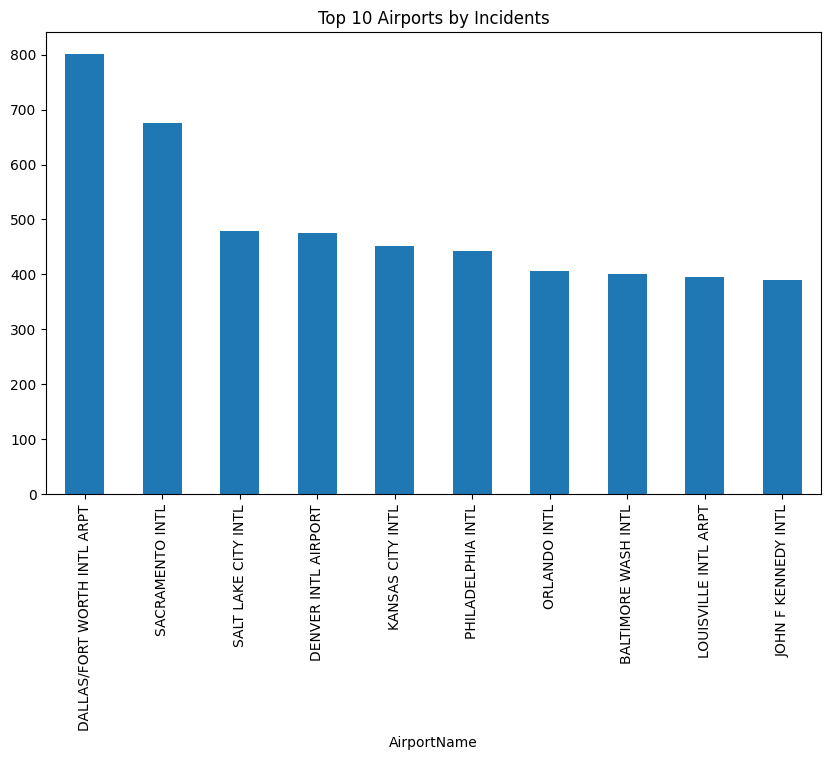

In [ ]:
plt.figure(figsize=(10, 6))
df['AirportName'].value_counts().head(10).plot(kind='bar', title='Top 10 Airports by Incidents')
plt.show()

<Axes: title={'center': 'Damage Distribution'}, xlabel='Damage'>

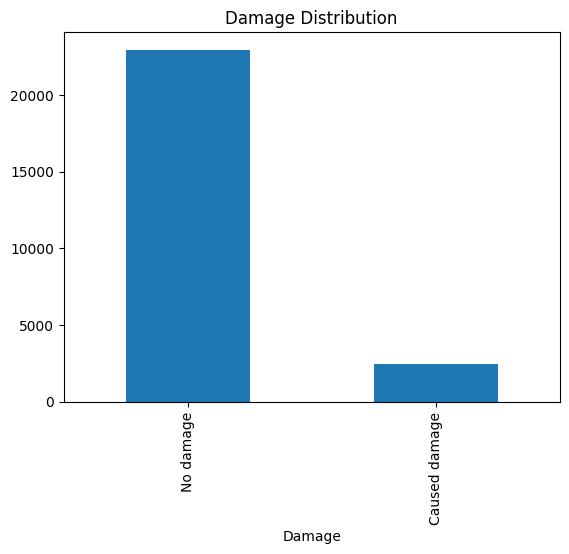

In [ ]:
df['Damage'].value_counts().plot(kind='bar', title='Damage Distribution')

<Axes: title={'center': 'Engine Types Distribution'}, xlabel='Engines'>

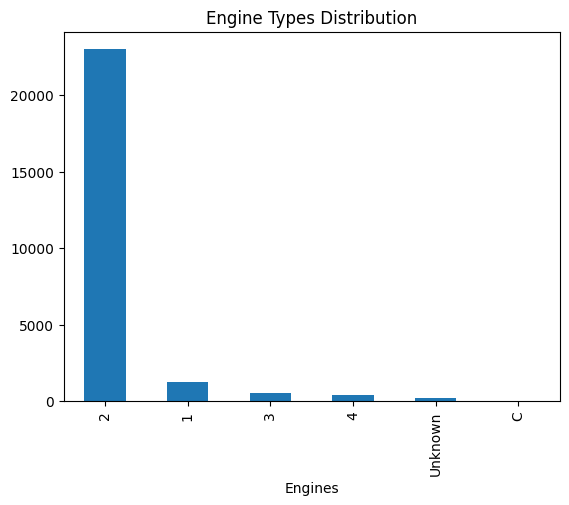

In [ ]:
df['Engines'].value_counts().plot(kind='bar', title='Engine Types Distribution')


<Axes: title={'center': 'Top 10 Operators by Incidents'}, xlabel='Operator'>

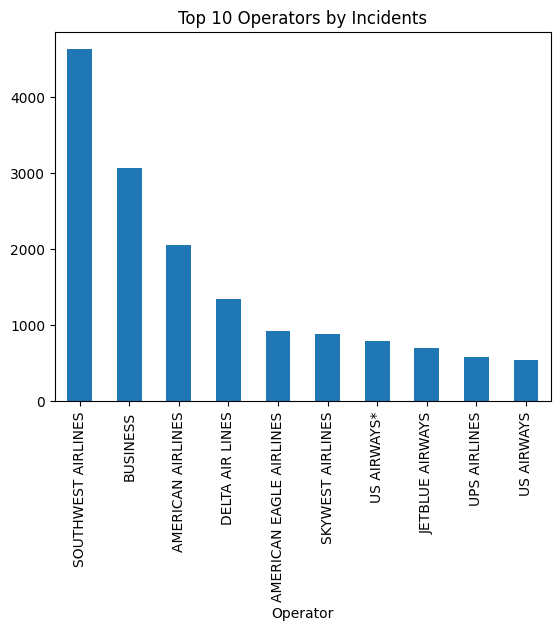

In [ ]:
df['Operator'].value_counts().head(10).plot(kind='bar', title='Top 10 Operators by Incidents')


<Axes: title={'center': 'Top 10 States by Incidents'}, xlabel='OriginState'>

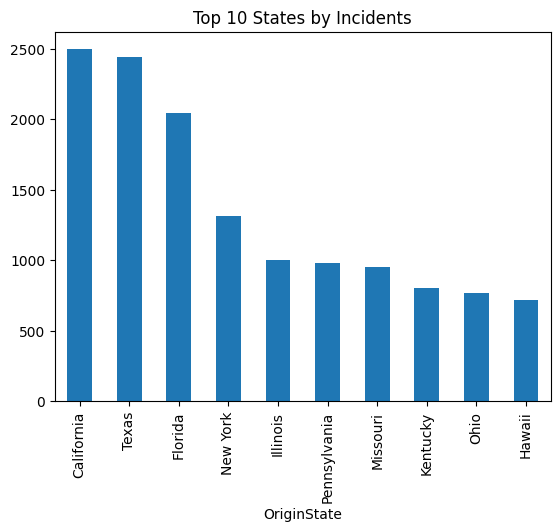

In [ ]:
df['OriginState'].value_counts().head(10).plot(kind='bar', title='Top 10 States by Incidents')


<Axes: title={'center': 'Incidents by Flight Phase'}, xlabel='FlightPhase'>

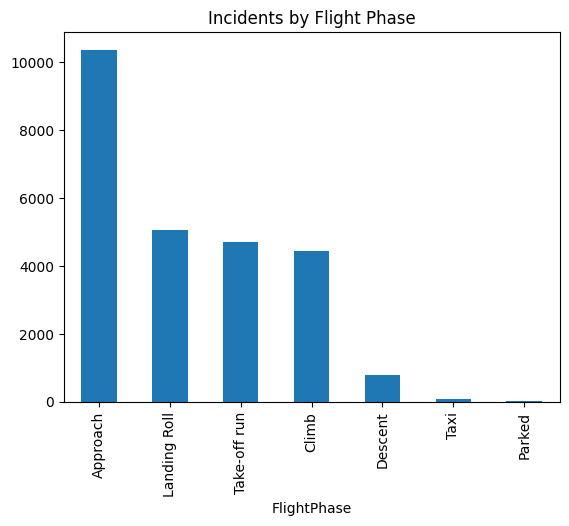

In [ ]:
df['FlightPhase'].value_counts().plot(kind='bar', title='Incidents by Flight Phase')


<Axes: title={'center': 'Wildlife Size Distribution'}, xlabel='WildlifeSize'>

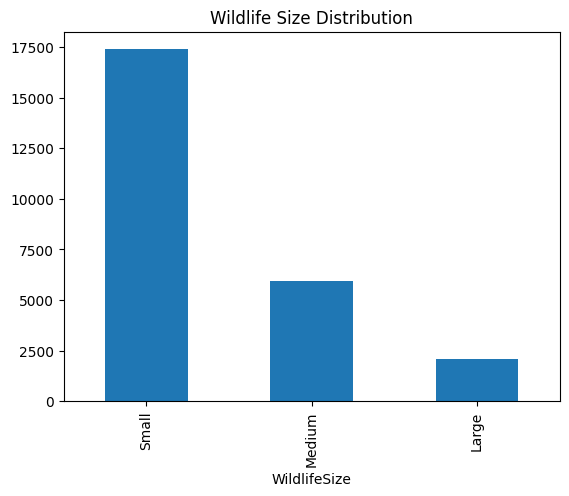

In [ ]:
df['WildlifeSize'].value_counts().plot(kind='bar', title='Wildlife Size Distribution')


<Axes: title={'center': 'Sky Conditions Distribution'}, xlabel='ConditionsSky'>

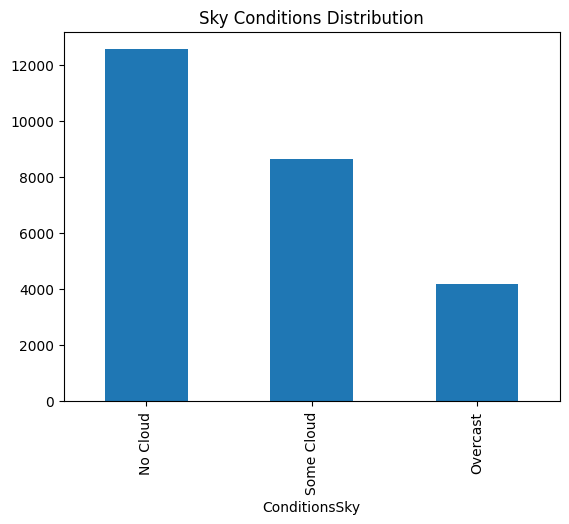

In [ ]:
df['ConditionsSky'].value_counts().plot(kind='bar', title='Sky Conditions Distribution')


<Axes: title={'center': 'Top 10 Wildlife Species by Incidents'}, xlabel='WildlifeSpecies'>

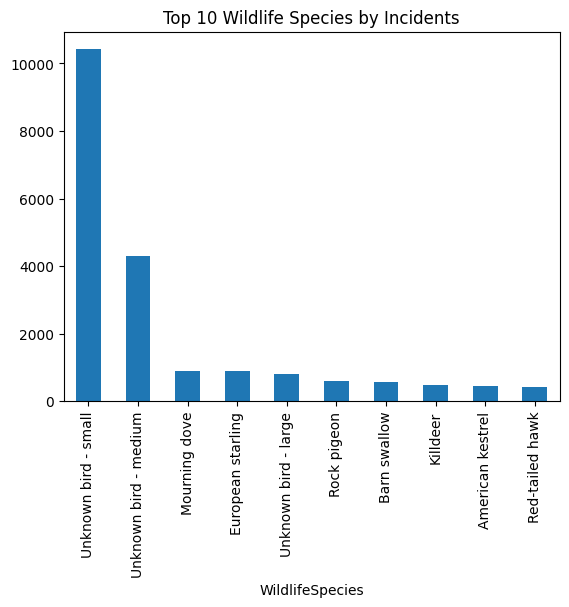

In [ ]:
df['WildlifeSpecies'].value_counts().head(10).plot(kind='bar', title='Top 10 Wildlife Species by Incidents')


<Axes: title={'center': 'Altitude Distribution'}, ylabel='Frequency'>

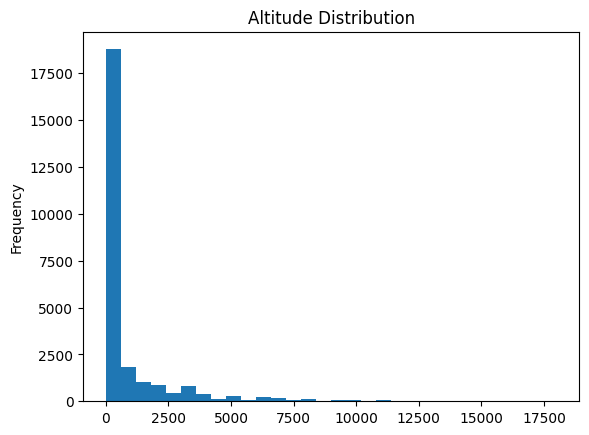

In [ ]:
df['Altitude'].plot(kind='hist', bins=30, title='Altitude Distribution')


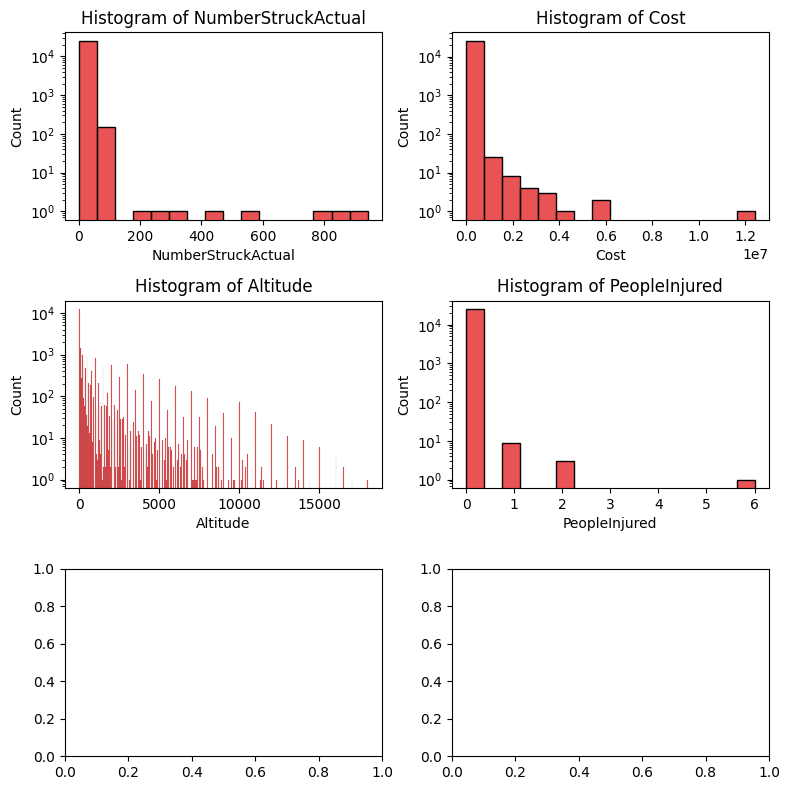

In [ ]:
sns.set_palette('Set1')
fig,ax = plt.subplots(3,2,figsize=(8,8))
ax = ax.flatten()

for i,feat in enumerate(df.select_dtypes(include='number').columns):
    sns.histplot(df[feat], ax=ax[i])
    ax[i].set_yscale('log') # Set logarithmic scale on x-axis
    ax[i].set_title(f"Histogram of {feat}")

plt.tight_layout()
plt.show()

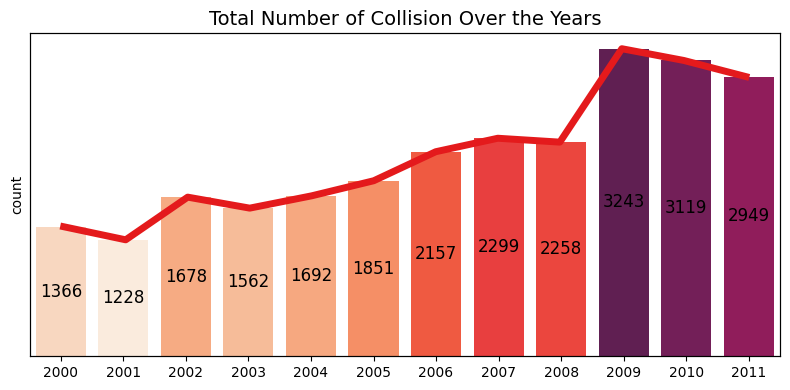

In [ ]:
cmap = plt.get_cmap('rocket_r')
fig,ax = plt.subplots(figsize=(8,4))

agg_data = df.FlightDate.dt.year.value_counts()
norm = plt.Normalize(agg_data.min(), agg_data.max())
bars = sns.barplot(x=agg_data.index,y=agg_data,ax=ax,)
bars.bar_label(bars.containers[0], fontsize=12,label_type='center')

for bar in bars.patches:
    height = bar.get_height()
    bar.set_facecolor(cmap(norm(height)*0.75))

ax2 = ax.twiny()
sns.lineplot(x=agg_data.index,y=agg_data,ax=ax2,linewidth=5,palette='b')
plt.title('Total Number of Collision Over the Years',fontsize=14)
plt.xticks([])
plt.yticks([])
ax.set_xlabel('')
plt.xlabel('')

plt.tight_layout()
plt.show()

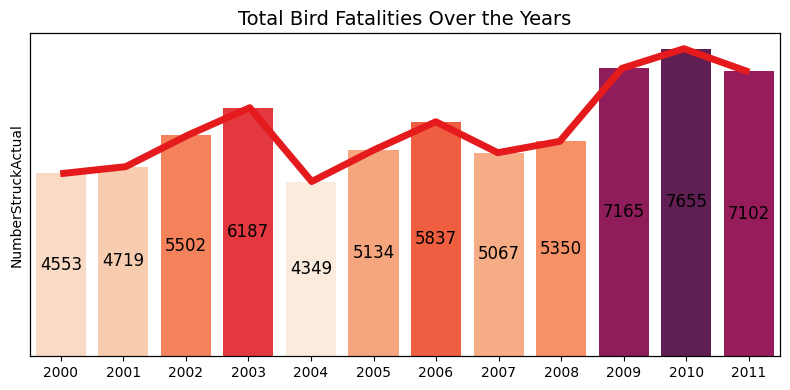

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))

agg_data = df.groupby(df.FlightDate.dt.year)['NumberStruckActual'].sum()
norm = plt.Normalize(agg_data.min(), agg_data.max())
bars = sns.barplot(x=agg_data.index,y=agg_data,ax=ax,)
bars.bar_label(bars.containers[0], fontsize=12,label_type='center')

for bar in bars.patches:
    height = bar.get_height()
    bar.set_facecolor(cmap(norm(height)*0.75))

ax2 = ax.twiny()
sns.lineplot(x=agg_data.index,y=agg_data, ax=ax2,linewidth=5)
plt.title('Total Bird Fatalities Over the Years',fontsize=14)
plt.xticks([])
plt.yticks([])
ax.set_xlabel('')
plt.xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['AirportName', 'MakeModel', 'NumberStruckActual', 'FlightDate',
       'Damage', 'Engines', 'Operator', 'OriginState', 'FlightPhase',
       'RemainsCollected?', 'WildlifeSize', 'ConditionsSky', 'WildlifeSpecies',
       'PilotWarned', 'Cost', 'Altitude', 'PeopleInjured', 'IsAircraftLarge?'],
      dtype='object')